### House Prices: Advanced Regression Techniques
<a href='House Prices: Advanced Regression Techniques'> Kaggle Link </a>

This is my very first kaggle Competition , I have tried to keep the Notebook Simple and clear with all needed explanation.

__Problem Statment__ 
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

__Goal__
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

__Metric__
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

__File descriptions__
train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

__Import Necessary Libraries__

In [1]:
#Data Manipulation 
import numpy as np
import pandas as pd

#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

__Read Train and Test Data__ 

In [2]:
train = pd.read_csv('Data/001 House Prices/train.csv')
test =  pd.read_csv('Data/001 House Prices/test.csv')

Let’s check out the size of the Data

__Train Data__ 

In [3]:
print("Train data shape ",train.shape)

Train data shape  (1460, 81)


__Test Data__

In [4]:
print("Test data shape ",test.shape)

Test data shape  (1459, 80)


Note we have one less column in test data set as compared to train i.e Sales Price 

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#### Exploring Sales Data 

In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Lets Check Skewness in dataset 

Skew is :  1.8828757597682129


[]

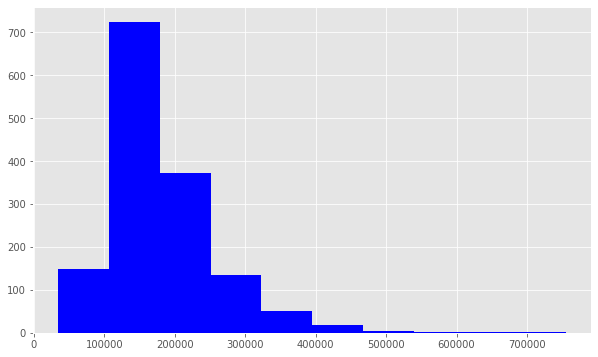

In [8]:
print("Skew is : ",train.SalePrice.skew())
plt.hist(train.SalePrice,color='blue')
plt.plot()

Now lets try using np.log to transform  train.SalesPrice calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.

In [9]:
target=np.log(train.SalePrice)

In [10]:
print("Skew is : ",target.skew())

Skew is :  0.12133506220520406


[]

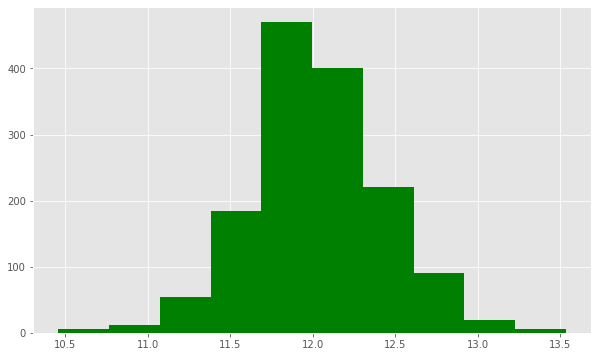

In [11]:
plt.hist(target,color='green')
plt.plot()

Now that we’ve transformed the target variable, let’s consider our features. First, we’ll check out the numerical features and make some plots. The .select_dtypes() method will return a subset of columns matching the specified data types.

In [12]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [13]:
corr=numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.

Let’s dig deeper on OverallQual. We can use the .unique() method to get the unique values.

In [14]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The OverallQual data are integer values in the interval 1 to 10 inclusive.

We can create a pivot table to further investigate the relationship between OverallQual and SalePrice. The Pandas docs demonstrate how to accomplish this task. We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.

In [15]:
quality_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)

In [16]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


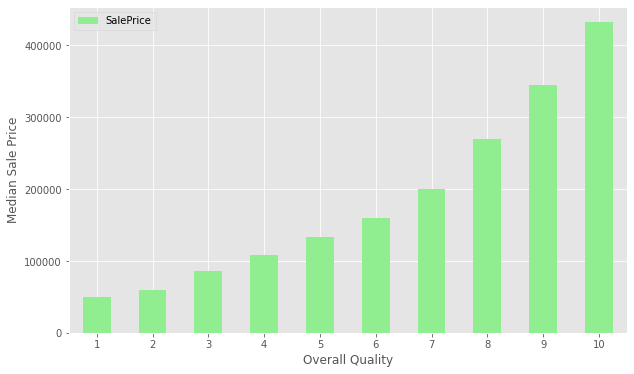

In [17]:
quality_pivot.plot(kind='bar',color='lightgreen')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that the median sales price strictly increases as Overall Quality increases.

Next, let’s use plt.scatter() to generate some scatter plots and visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

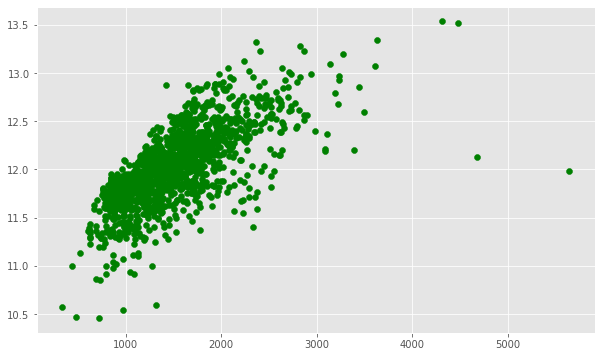

In [18]:
plt.scatter(train['GrLivArea'],target,color='green')

At first glance, we see that increases in living area correspond to increases in price. We will do the same for GarageArea.

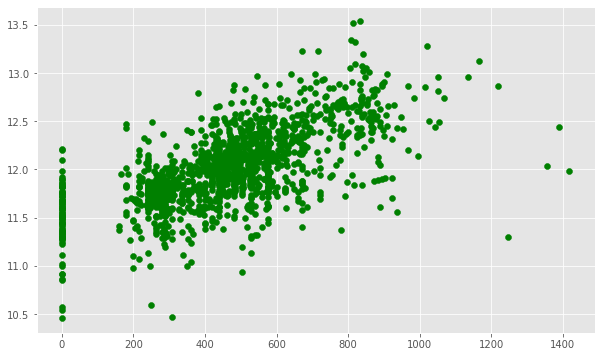

In [19]:
plt.scatter(train['GarageArea'],target,color='green')

Notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data. 

In [20]:
train=train[train['GarageArea']<1200]

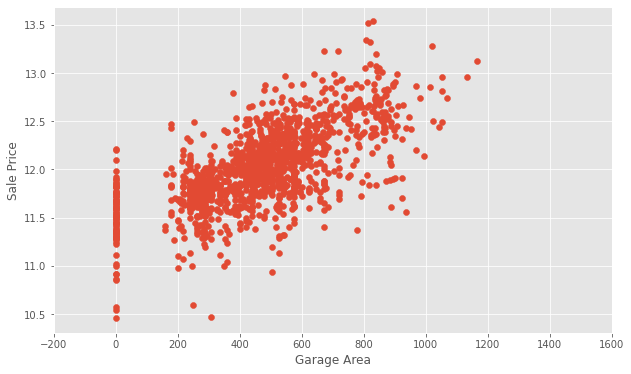

In [21]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Handling Null Values

<AxesSubplot:>

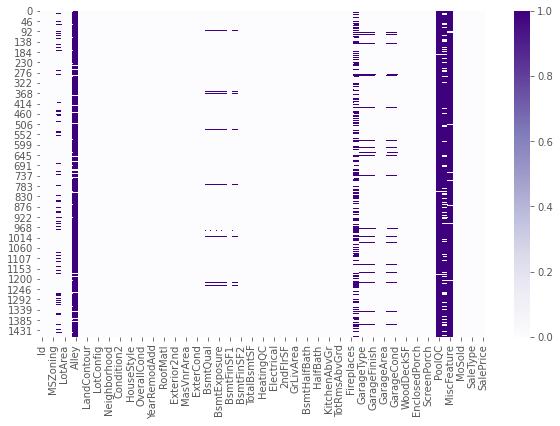

In [22]:
sns.heatmap(train.isnull(),cmap='Purples')

In [23]:
nulls=pd.DataFrame(data=train.isnull().sum().sort_values(ascending=False)[:20])

nulls

,0
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


The documentation can help us understand the missing values. In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
We can find a similar relationship between many of the Garage-related columns.

Let’s take a look at one of the other columns, MiscFeature. We’ll use the Series.unique() method to return a list of the unique values.

In [24]:
print("Unique Values : ",train.MiscFeature.unique())

Unique Values :  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


We can use the documentation to find out what these values indicate:

MiscFeature: Miscellaneous feature not covered in other categories<br>

<ul>
   <li>Elev Elevator<br>
   <li>Gar2 2nd Garage (if not described in garage section)<br>
   <li>Othr Other<br>
   <li>Shed Shed (over 100 SF)<br>
   <li>TenC Tennis Court<br>
   <li> NA   None<br>

These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later

Wrangling the non-numeric Features
Let’s now consider the non-numeric features.

In [25]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


The count column indicates the count of non-null observations, while unique counts the number of unique values. top is the most commonly occurring value, with the frequency of the top value shown by freq.

For many of these features, we might want to use one-hot encoding to make use of the information for modeling.

### Transforming and engineering features

When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

To demonstrate how this works, consider the Street data, which indicates whether there is Gravel or Paved road access to the property.

In [26]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data.

In [27]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(train.Street,drop_first=True)

In [28]:
print(train.enc_street.value_counts(),'\n')

1    1450
0       5
Name: enc_street, dtype: int64 



In [29]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [30]:
condition_pivot=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)

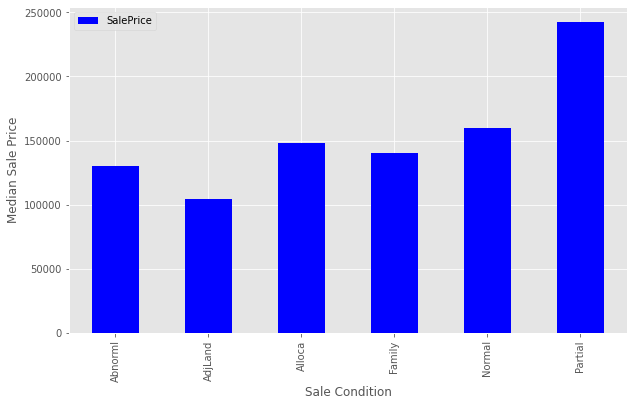

In [31]:
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0

In [32]:
def encode(val):
    if val == 'Partial': 
        return 1 
    else : 
        return 0
    
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)    

In [33]:
condition_pivot=train.pivot_table(index='enc_condition',values='SalePrice',aggfunc=np.median)

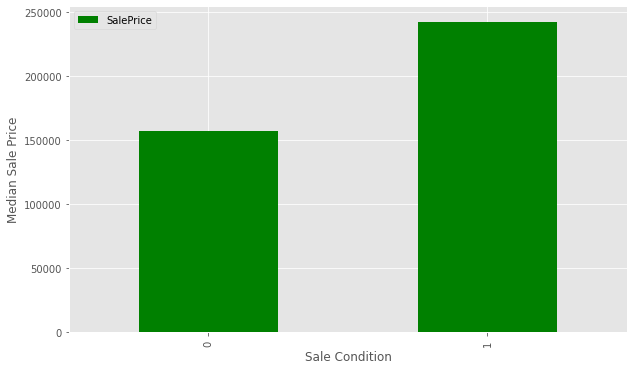

In [34]:
condition_pivot.plot(kind='bar',color='green')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.show()

In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enc_street,enc_condition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,1,0


Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference.

In [36]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

Check if the all of the columns have 0 null values.

In [37]:
sum(data.isnull().sum() != 0)

0

### Build a linear model

We will seprate features and Target column to train the model 

We will assign the features to X and the target variable to y. We use np.log() to transform the y variable for the model.

We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [38]:
y=np.log(train.SalePrice)
X=data.drop(['SalePrice','Id'],axis=1)

We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=.33)

We will first create a __Linear Regression model__.

In [41]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we’ll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [42]:
model = lr.fit(X_train, y_train)

#### Evaluate the performance and visualize results

Each competition might evaluate the submissions differently. In this competition, Kaggle will evaluate our submission using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.



In [43]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8934404275649744


Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set.



In [44]:
predictions = model.predict(X_test)

Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set.



In [45]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01693556167674382


We can view this relationship graphically with a scatter plot.

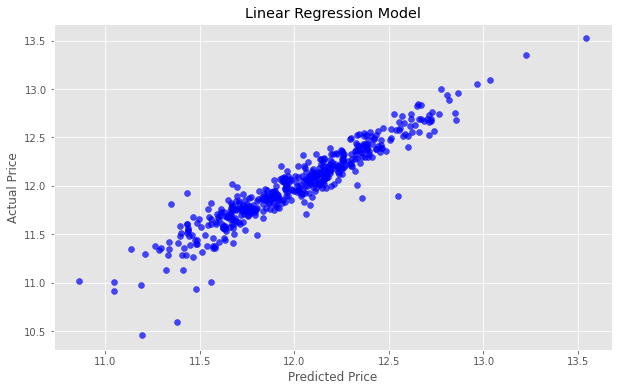

In [46]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

#### Make a submission

We’ll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

We’ll log in to our Kaggle account and go to the submission page to make a submission.
We will use the DataFrame.to_csv() to create a csv to submit.
The first column must the contain the ID from the test data.

In [47]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [48]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [49]:
predictions = model.predict(feats)

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [50]:
final_predictions = np.exp(predictions)

In [51]:
submission['SalePrice'] = final_predictions

In [52]:
submission.to_csv('/submission1.csv', index=False)